In [ ]:
## PyTorch code for a Multilayer Perceptron

In this section we will go through the code for a multilayer perceptron in PyTorch.

First of all we set up the required imports and set up the device used for training.

In [1]:
from __future__ import division, print_function, absolute_import
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    
print('PyTorch version:', torch.__version__, ' Device:', device)

Extracting ../scratch/train-images-idx3-ubyte.gz
Extracting ../scratch/train-labels-idx1-ubyte.gz
Extracting ../scratch/t10k-images-idx3-ubyte.gz
Extracting ../scratch/t10k-labels-idx1-ubyte.gz


Here are the relevant network parameters and graph input for context.

In [2]:
# Hyper-Parameters
learning_rate = 0.001 # Initial learning rate
training_epochs = 5 # Number of epochs to train
batch_size = 100 # Number of images per batch
display_step = 1 # How often to output model metrics during training

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

In [ ]:
Here, we load the MNIST dataset from the torchvision library.

In [ ]:
# The dataset
train_dataset = datasets.MNIST('./data', 
                               train=True, 
                               download=True, 
                               transform=transforms.ToTensor())

test_dataset = datasets.MNIST('./data', 
                                    train=False, 
                                    transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                                batch_size=batch_size, 
                                                shuffle=False)

### Model Creation
Here, we create a ‘multi-layer’ model as there is more than one hidden layer, as below we define `fc_1` and `fc_2`.

The MLP definition below does two things:

1. It defines the model in Multilayer_Perceptron().
2. It initialises and assigns values to each layer of the network.

In [4]:
class Multilayer_Perceptron(nn.Module):
    def __init__(self):
        super(Multilayer_Perceptron, self).__init__()

        # Hidden fully connected layer with 256 neurons
        self.fc1 = nn.Linear(n_input, n_hidden_1)
        self.fc2 = nn.Linear(n_hidden_1, n_hidden_2)
        self.out = nn.Linear(n_hidden_2, n_classes)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return F.log_softmax(self.out(x), dim=1)

### Define loss and optimizer

In the following snippet we define our model, loss operation, optimiser. PyTorch will take care of all initialisation for us.

In [6]:
model = Multilayer_Perceptron().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

### Train and evaluate the model

Epoch: 0001 cost=287.250201395
Epoch: 0002 cost=91.597096405
Epoch: 0003 cost=68.684905194
Epoch: 0004 cost=55.829017655
Epoch: 0005 cost=47.115250719
Epoch: 0006 cost=41.359397067
Epoch: 0007 cost=37.130086868
Epoch: 0008 cost=33.303088518
Epoch: 0009 cost=30.589550092
Epoch: 0010 cost=28.341824516
Epoch: 0011 cost=26.929923002
Epoch: 0012 cost=24.618215298
Epoch: 0013 cost=23.411146597
Epoch: 0014 cost=22.941275415
Epoch: 0015 cost=21.737917544
Optimization Finished!
Accuracy: 0.8837


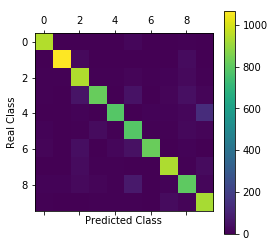

In [8]:
# Set model to training mode
model.train()

# training loop
for epoch in range(training_epochs):
# Loop over each batch from the training set
    for batch_idx, (img, lbl) in enumerate(train_loader):
        # Copy image data to GPU if available
        img = img.to(device)
        lbl = lbl.to(device)

        # Zero gradient buffers
        optimizer.zero_grad() 
        
        # Pass image data through the network
        output = model(img)

        # Calculate loss
        loss = criterion(output, lbl)

        # Backpropagate
        loss.backward()
        
        # Update weights
        optimizer.step()
    
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1), "Loss = {:.9f}".format(loss.item()))

print("Optimization Finished!")

# et model to evaluation mode

model.eval()

for data, target in test_loader:

    data = data.to(device)
    target = target.to(device)

    output = model(data)

    _, pred = torch.max(output, dim=1)

    correct += pred.eq(target).cpu().sum()

accuracy = 100. * correct.to(torch.float32) / len(test_loader.dataset)

print("Accuracy:", accuracy.item())


### Setup tensorboard for Google colab

In [ ]:
import time
import subprocess

!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip

LOG_DIR = os.getcwd()
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)


proc = subprocess.Popen(['%s/ngrok' % os.getcwd() , 'http', '6006'])
print ("start ngrok with pid %s" % proc.pid)

time.sleep(3)
try:
    ! curl -s http://localhost:4040/api/tunnels | python3 -c \
        "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"
except:
    pass

In [11]:
# Cleanup
#proc.kill()
#! rm -rf *